1. Evaluar juicios de hipótesis (2 puntos): para evaluar la pertinencia de diversas
hipótesis, se te solicita discernir si es posible rechazar la hipótesis nula.

In [ ]:
""" 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se
identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se
identificaron como heterosexuales. El objetivo era medir actitudes frente a la
adopción homoparental. La organización encargada de procesar los datos obtuvo
los siguientes resultados"""

In [ ]:
"""○ El 67% de los encuestados por heterosexuales se mostró a favor de la
adopción homoparental, mientras que un 72% de los encuestados por
activistas que se identificaron como homosexuales se mostraron a favor
de la adopción homoparental.
○ Asumiendo que la hipótesis nula es que ambos porcentajes no son
diferentes, y la hipótesis alternativa es que existe una diferencia
substancial entre ambos.
○ Con p-valor de 0.1183 ¿es posible rechazar la hipótesis nula en favor de la
alternativa con una confianza de 95%?, ¿Cuanta es la confianza máxima
con la que sería posible rechazar la hipótesis nula en favor de la alternativa
con estos resultados?"""

In [6]:
# El 95% de confianza corresponde a un nivel de significancia de 0.05
#El valor de probabilidad o valor p en este caso es de 0.1183
#Según lo anterior el valor p es mayor que alfa (0.1183>0.05), esto significa que NO puedo rechazar H0 o la hipótesis nula.

#Si el valor p calculado hubiese sido menos al alfa (p<0.05) podríamos inferir que tenemos evidencia para sustentar la 
#Hipótesis alterinativa (que no sucede en este caso)

2. Importar la base de datos utilizada la sesión presencial anterior (2 puntos):

In [1]:
#evitamos los warnings
import warnings
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df = pd.read_csv('nations.csv', encoding='latin-1')

In [4]:
df.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


In [5]:
#Apellidos desde la A hasta la N: Enfocarse en las variables chldmort, adfert y life.

variables_sl = ['chldmort', 'adfert' , 'life','country', 'region', 'gdp', 'pop', 'urban', 'co2', 'gini']

In [6]:
df_sl = df.loc[:,variables_sl]

In [7]:
df_sl.head()

,chldmort,adfert,life,country,region,gdp,pop,urban,co2,gini
0,34.75,7.300000,72.316666,Algeria,Africa,7300.399902,34172236,64.933334,15.0,NaN
1,122.75,111.699997,54.733334,Benin,Africa,1338.800049,8237634,41.000000,1.2,NaN
2,60.25,52.099998,52.250000,Botswana,Africa,12307.400391,1941233,59.250000,9.2,NaN
3,170.50,124.800003,53.783333,Burkina Faso,Africa,1063.400024,15308383,23.583334,0.2,NaN
4,168.50,18.600000,48.866665,Burundi,Africa,349.200012,7821783,10.250000,0.1,33.299999


In [8]:
# Agregamos variables binarias de cada opcion de la variable región

In [9]:
df_sl['region'].value_counts()

Africa      52
Asia        49
Europe      43
Americas    35
Oceania     15
Name: region, dtype: int64

In [10]:
df_sl['r_africa']=np.where(df_sl['region']=='Africa',1,0)

In [11]:
df_sl['r_asia']=np.where(df_sl['region']=='Asia',1,0)

In [12]:
df_sl['r_europa']=np.where(df_sl['region']=='Europe',1,0)

In [13]:
df_sl['r_america']=np.where(df_sl['region']=='Americas',1,0)

In [14]:
df_sl['r_oceania']=np.where(df_sl['region']=='Oceania',1,0)

In [15]:
df_sl.sample(5)

,chldmort,adfert,life,country,region,gdp,pop,urban,co2,gini,r_africa,r_asia,r_europa,r_america,r_oceania
56,19.75,78.699997,75.216667,Belize,Americas,6208.799805,296200,51.200001,10.75,NaN,0,0,0,1,0
55,11.50,42.599998,76.300003,Barbados,Americas,19189.000000,271917,42.900002,16.65,NaN,0,0,0,1,0
179,170.00,171.100006,49.666668,Angola,Oceania,4662.000000,17783300,56.250000,2.25,NaN,0,0,0,0,1
87,203.00,118.699997,47.400002,Afghanistan,Asia,938.400024,29501834,21.916666,0.10,NaN,0,1,0,0,0
112,17.50,12.200000,75.516670,Maldives,Asia,4773.200195,305550,36.950001,9.50,NaN,0,1,0,0,0


3. Implementar una función de prueba de hipótesis a mano (3 puntos)

In [19]:
def hipotesis(df, variable,  binarize):
    """ Esta es una prueba para la hipótesis nula de que 2 muestras independientes tienen valores promedio (esperados) idénticos.
    Esta prueba asume que las poblaciones tienen varianzas idénticas por defecto..
    Esta prueba de hipótesis es de dos colas"""
    from scipy.stats import norm, ttest_ind
    #borro na de variable
    df=df.dropna(subset=[variable])
    a=[]
    b=[]
    #separo variable segun binarize
    for i in df.index:
        if df[binarize][i]==1:
            a.append(df[variable][i])
        elif df[binarize][i]==0:
            b.append(df[variable][i])
    a_arr = pd.array(data=a,dtype=float) 
    b_arr = pd.array(data=b,dtype=float) 
#print(a)
#print(b)
   #obtengo valores valor t y pval con  ttest_ind
    val=ttest_ind(a_arr,b_arr)
    #print(val)
    t=val[0]
    pval=val[1]
    print(f"La media de {variable} cuando {binarize} = 1 es:  {np.mean(a_arr)}")
    print(f"La media de {variable} cuando {binarize} = 0 es:  {np.mean(b_arr)}")
    print(f"La diferencia entre medias es {abs(np.mean(a_arr)- np.mean(b_arr))}")
    print(f"T estadistico es =  {t} P valores es =  {pval}")
    print("                                          ")

In [20]:
hipotesis(df_sl,'gini', 'r_africa')

La media de gini cuando r_africa = 1 es:  40.51363615556196
La media de gini cuando r_africa = 0 es:  40.4644069025072
La diferencia entre medias es 0.04922925305476156
T estadistico es =  0.023072209920669003 P valores es =  0.9816508510686119
                                          


4. Implementar una función que grafique los histogramas para ambas muestras (3
puntos)

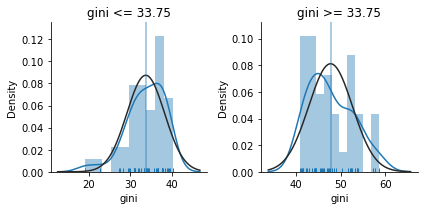

In [21]:
import seaborn as sns
def binarize_histogram_r(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    
    grid = sns.FacetGrid(tmp, col='binarize', col_wrap=2, sharex=False, sharey=False)
    grip = grid.map(sns.distplot, variable, rug=True, kde=True, fit=stats.norm, bins=10).set_axis_labels(variable)
    axes = grid.axes.flatten()
    axes[0].set_title(f"{variable} <= {round(np.mean(hist_0), 2)}")
    axes[1].set_title(f"{variable} >= {round(np.mean(hist_0), 2)}")
    axes[0].axvline(np.mean(hist_0) , alpha=0.5)
    axes[1].axvline(np.mean(hist_1) , alpha=0.5)
    
    
binarize_histogram_r(df_sl,'gini')

Para las tres variables de interés acorde a su grupo, analice las diferencias de
medias por cada continente, y posteriormente grafique. Concluya con los
principales resultados al respecto.<br>
chldmort, adfert y life.


In [22]:
hipotesis(df_sl,'chldmort', 'r_africa')
hipotesis(df_sl,'chldmort', 'r_asia')
hipotesis(df_sl,'chldmort', 'r_europa')
hipotesis(df_sl,'chldmort', 'r_america')
hipotesis(df_sl,'chldmort', 'r_oceania')

La media de chldmort cuando r_africa = 1 es:  109.75
La media de chldmort cuando r_africa = 0 es:  24.74822695035461
La diferencia entre medias es 85.0017730496454
T estadistico es =  14.17367667788517 P valores es =  1.244572684496239e-31
                                          
La media de chldmort cuando r_asia = 1 es:  37.104166666666664
La media de chldmort cuando r_asia = 0 es:  51.141379310344824
La diferencia entre medias es 14.03721264367816
T estadistico es =  -1.602738386676471 P valores es =  0.1106448646711535
                                          
La media de chldmort cuando r_europa = 1 es:  7.046511627906977
La media de chldmort cuando r_europa = 0 es:  59.29
La diferencia entre medias es 52.243488372093026
T estadistico es =  -6.262400472976766 P valores es =  2.4506589890929246e-09
                                          
La media de chldmort cuando r_america = 1 es:  23.264285714285716
La media de chldmort cuando r_america = 0 es:  53.052215189873415
La difer

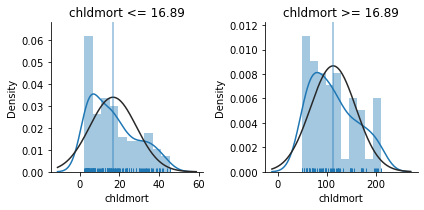

In [23]:
binarize_histogram_r(df_sl,'chldmort')

In [24]:
#Estableciendo un alfa de 0.05 (95% de confianza no es por azar) se puede observar que el p valor en africa, europa y america es 
# menor al alfa establecido, por lo cual se tiene evidencia para rechazar la hpótesis nula que indica igualdad de medias, para la variable
#chldmort

# Se podría esperar valores más altos de la variable en africa (media 109.) y  menores en europa ( media 7.0)

In [25]:
hipotesis(df_sl,'adfert', 'r_africa')
hipotesis(df_sl,'adfert', 'r_asia')
hipotesis(df_sl,'adfert', 'r_europa')
hipotesis(df_sl,'adfert', 'r_america')
hipotesis(df_sl,'adfert', 'r_oceania')

La media de adfert cuando r_africa = 1 es:  92.72115342892133
La media de adfert cuando r_africa = 0 es:  36.83450711361119
La diferencia entre medias es 55.88664631531014
T estadistico es =  9.444409431356496 P valores es =  1.2481674170069097e-17
                                          
La media de adfert cuando r_asia = 1 es:  33.86530622170896
La media de adfert cuando r_asia = 0 es:  57.87999988671007
La diferencia entre medias es 24.014693665001104
T estadistico es =  -3.386269877966909 P valores es =  0.0008592686089688165
                                          
La media de adfert cuando r_europa = 1 es:  15.53720931396928
La media de adfert cuando r_europa = 0 es:  62.14503303268887
La diferencia entre medias es 46.607823718719594
T estadistico es =  -6.797972597840039 P valores es =  1.3040875269879142e-10
                                          
La media de adfert cuando r_america = 1 es:  63.659999847412095
La media de adfert cuando r_america = 0 es:  49.2069181998570

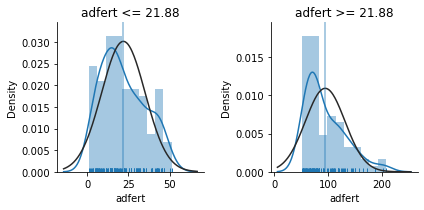

In [26]:
binarize_histogram_r(df_sl,'adfert')

In [27]:
##Estableciendo un alfa de 0.05 (95% de confianza no es por azar) se puede observar que el p valor en africa, europa y asia es 
# menor al alfa establecido, por lo cual se tiene evidencia para rechazar la hipótesis nula que indica igualdad de medias, para la variable
#adfert

# Se podría esperar valores más altos de la variable en africa (media 92) y  más bajos en europa (mean 15.5)

In [28]:
hipotesis(df_sl,'life', 'r_africa')
hipotesis(df_sl,'life', 'r_asia')
hipotesis(df_sl,'life', 'r_europa')
hipotesis(df_sl,'life', 'r_america')
hipotesis(df_sl,'life', 'r_oceania')

La media de life cuando r_africa = 1 es:  56.49038454202504
La media de life cuando r_africa = 0 es:  73.21114999475614
La diferencia entre medias es 16.7207654527311
T estadistico es =  -15.174602759471485 P valores es =  1.0713988391633837e-34
                                          
La media de life cuando r_asia = 1 es:  70.87244882388991
La media de life cuando r_asia = 0 es:  68.0050572625522
La diferencia entre medias es 2.867391561337712
T estadistico es =  1.7346722179790488 P valores es =  0.08440370105334277
                                          
La media de life cuando r_europa = 1 es:  76.94573619753815
La media de life cuando r_europa = 0 es:  66.38951416520882
La diferencia entre medias es 10.55622203232933
T estadistico es =  6.735355531733242 P valores es =  1.8491610377704238e-10
                                          
La media de life cuando r_america = 1 es:  73.45142800467355
La media de life cuando r_america = 0 es:  67.68983217155409
La diferencia entre 

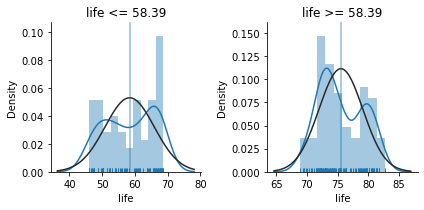

In [29]:
binarize_histogram_r(df_sl,'life')

In [30]:
##Estableciendo un alfa de 0.05 (95% de confianza no es por azar) se puede observar que el p valor en africa, europa y america es 
# menor al alfa establecido, por lo cual se tiene evidencia para rechazar la hipótesis nula que indica igualdad de medias, para la variable
#life

# Se podría esperar valores más altos de la variable en europa (media 76.9) y  más bajos en africa (mean 56.4)
#A diferencia de las variables anteriores, las medias entre regiones no son tan alejadas entres ellas y de media total 
#de la variable(58.39)